(64, 64)


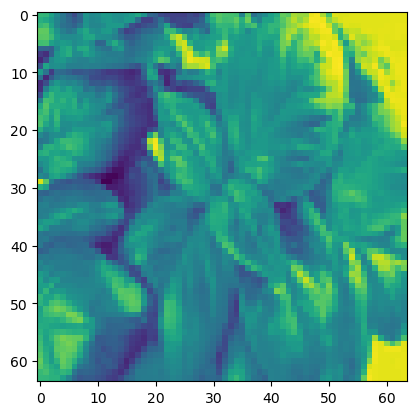

In [1]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image

test = Image.open('./img/train/Basil/basil (1).jpeg')
test = test.resize((64,64))
test = np.array(test)
test = cv2.cvtColor(test,cv2.COLOR_RGB2GRAY)
print(test.shape)
plt.imshow(test)

In [2]:
import os
train_image = []
train_labels = []
index = 0
lis = os.listdir('./img/train/')
for i in lis:
    i_lis = os.listdir(f'./img/train/{i}')
    for j in i_lis:
        print(j)
        img = Image.open(f'./img/train/{i}/{j}')
        img = img.resize((64,64))
        img = np.array(img)
        img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        train_image.append(img)
        train_labels.append(index)
    index += 1
    

basil (1).jpeg
basil (1).jpg
basil (1).png
basil (10).jpg
basil (11).jpg
basil (12).jpg
basil (13).jpg
basil (14).jpg
basil (15).jpg
basil (16).jpg
basil (17).jpg
basil (18).jpg
basil (19).jpg
basil (2).jpeg
basil (2).jpg
basil (2).png
basil (20).jpg
basil (21).jpg
basil (22).jpg
basil (23).jpg
basil (24).jpg
basil (25).jpg
basil (26).jpg
basil (3).jpeg
basil (3).jpg
basil (3).png
basil (4).jpg
basil (5).jpg
basil (6).jpg
basil (7).jpg
basil (8).jpg
basil (9).jpg
new_basil (1).jpeg
new_basil (1).jpg
new_basil (1).webp
new_basil (10).jpg
new_basil (10).webp
new_basil (100).jpg
new_basil (101).jpg
new_basil (102).jpg
new_basil (103).jpg
new_basil (104).jpg
new_basil (105).jpg
new_basil (106).jpg
new_basil (107).jpg
new_basil (108).jpg
new_basil (109).jpg
new_basil (11).jpg
new_basil (11).webp
new_basil (110).jpg
new_basil (111).jpg
new_basil (112).jpg
new_basil (113).jpg
new_basil (114).jpg
new_basil (115).jpg
new_basil (116).jpg
new_basil (117).jpg
new_basil (118).jpg
new_basil (119).jp

In [3]:
train_image=np.array(train_image)
train_labels=np.array(train_labels)
print(train_image.shape,train_labels.shape)

(9172, 64, 64) (9172,)


In [4]:
import os
test_image = []
test_labels = []
index = 0
lis = os.listdir('./img/test/')
for i in lis:
    i_lis = os.listdir(f'./img/test/{i}')
    for j in i_lis:
        img = Image.open(f'./img/test/{i}/{j}')
        img = img.resize((64,64))
        img = np.array(img)
        img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        test_image.append(img)
        test_labels.append(index)
    index += 1
    

In [5]:
test_image=np.array(test_image)
test_labels=np.array(test_labels)
print(test_image.shape,test_labels.shape)

(1319, 64, 64) (1319,)


In [6]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images,labels

train_images, train_labels = get_preprocessed_data(train_image,train_labels)
test_images, test_labels = get_preprocessed_data(test_image,test_labels)

In [7]:
print('train dataset shape', train_images.shape, train_labels.shape)
print('test dataset shape',test_images.shape,test_labels.shape)

train dataset shape (9172, 64, 64) (9172,)
test dataset shape (1319, 64, 64) (1319,)


In [8]:
train_images[0]

array([[0.6901961 , 0.68235296, 0.6156863 , ..., 0.9490196 , 0.9490196 ,
        0.9490196 ],
       [0.65882355, 0.63529414, 0.5803922 , ..., 0.9490196 , 0.9490196 ,
        0.9490196 ],
       [0.69411767, 0.72156864, 0.6117647 , ..., 0.9490196 , 0.9529412 ,
        0.9529412 ],
       ...,
       [0.75686276, 0.7019608 , 0.64705884, ..., 0.9490196 , 0.9529412 ,
        0.9529412 ],
       [0.69803923, 0.72156864, 0.6666667 , ..., 0.9490196 , 0.9490196 ,
        0.9529412 ],
       [0.6862745 , 0.68235296, 0.6666667 , ..., 0.9490196 , 0.9490196 ,
        0.9529412 ]], dtype=float32)

In [9]:
train_labels[0]

0.0

In [10]:
INPUT_SIZE = 64

In [16]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape = (INPUT_SIZE, INPUT_SIZE)),
    Dense(100,activation='relu'),
    Dense(30,activation='relu'),
    Dense(50,activation='relu'),
    Dense(5,activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               409700    
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 50)                1550      
                                                                 
 dense_6 (Dense)             (None, 5)                 255       
                                                                 
Total params: 414,535
Trainable params: 414,535
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import  Accuracy
import tensorflow as tf

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape,test_oh_labels.shape)

(9172, 5) (1319, 5)


In [19]:
train_oh_labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [20]:
history = model.fit(x=train_images,y=train_oh_labels, batch_size=10,epochs=1000,verbose=1)

Epoch 1/1000
918/918 [==============================] - 4s 4ms/step - loss: 1.5992 - accuracy: 0.2793
Epoch 2/1000
918/918 [==============================] - 4s 4ms/step - loss: 1.5723 - accuracy: 0.3060
Epoch 3/1000
918/918 [==============================] - 4s 5ms/step - loss: 1.5568 - accuracy: 0.3196
Epoch 4/1000
918/918 [==============================] - 4s 5ms/step - loss: 1.5480 - accuracy: 0.3268
Epoch 5/1000
918/918 [==============================] - 4s 5ms/step - loss: 1.5423 - accuracy: 0.3266
Epoch 6/1000
918/918 [==============================] - 5s 5ms/step - loss: 1.5387 - accuracy: 0.3281
Epoch 7/1000
918/918 [==============================] - 5s 6ms/step - loss: 1.5338 - accuracy: 0.3311
Epoch 8/1000
918/918 [==============================] - 5s 6ms/step - loss: 1.5271 - accuracy: 0.3371
Epoch 9/1000
918/918 [==============================] - 5s 6ms/step - loss: 1.5247 - accuracy: 0.3369
Epoch 10/1000
918/918 [==============================] - 5s 6ms/step - loss: 1.520

In [53]:
history = model.fit(x=train_images, y=train_oh_labels,batch_size=10,validation_data=(test_images,test_oh_labels),epochs=100,verbose=1)

Epoch 1/100


918/918 [==============================] - 5s 5ms/step - loss: 1.5071 - accuracy: 0.3497 - val_loss: 1.6297 - val_accuracy: 0.2919
Epoch 2/100
918/918 [==============================] - 5s 5ms/step - loss: 1.5046 - accuracy: 0.3495 - val_loss: 1.6130 - val_accuracy: 0.2835
Epoch 3/100
918/918 [==============================] - 6s 6ms/step - loss: 1.5034 - accuracy: 0.3553 - val_loss: 1.5943 - val_accuracy: 0.2851
Epoch 4/100
918/918 [==============================] - 5s 6ms/step - loss: 1.5027 - accuracy: 0.3512 - val_loss: 1.6971 - val_accuracy: 0.2525
Epoch 5/100
918/918 [==============================] - 5s 6ms/step - loss: 1.5008 - accuracy: 0.3564 - val_loss: 1.5884 - val_accuracy: 0.2684
Epoch 6/100
918/918 [==============================] - 5s 6ms/step - loss: 1.5020 - accuracy: 0.3522 - val_loss: 1.6468 - val_accuracy: 0.2820
Epoch 7/100
918/918 [==============================] - 5s 6ms/step - loss: 1.4992 - accuracy: 0.3514 - val_loss: 1.6257 - val_accuracy: 0.2926
Epoch 8/100